In [176]:
# Imports 
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt

print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)

pandas version: 1.1.3
matplotlib version: 3.3.2


# Getting the data

### Loading the CSV file SolarData.csv, provided by Open Remote

In [177]:
df = pd.read_csv("SolarData.csv")

# Exploratory data analysis

### Base info about the CSV file

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       5474 non-null   object 
 1   name            5474 non-null   object 
 2   attribute_name  5474 non-null   object 
 3   value           5474 non-null   float64
dtypes: float64(1), object(3)
memory usage: 171.2+ KB


In [179]:
df.shape

(5474, 4)

In [180]:
df.describe()

,value
count,5474.000000
mean,3529.655081
std,4405.806515
min,0.000000
25%,0.000000
50%,11.828000
75%,4824.483033
max,12327.543179


In [181]:
df.nunique()

timestamp         5079
name                 2
attribute_name       2
value             3215
dtype: int64

### Base details about the dataset

In [182]:
df.head()

,timestamp,name,attribute_name,value
0,2021-02-11 04:10:22.926,Tamar building,totalPower,0.0
1,2021-02-11 04:10:23.089,Humber building,totalPower,0.0
2,2021-02-25 04:13:48.669,Humber building,totalPower,0.0
3,2021-02-25 04:13:54.488,Tamar building,totalPower,0.0
4,2021-02-11 04:40:23.122,Tamar building,totalPower,0.0


In [183]:
df.name.value_counts()

Humber building    2743
Tamar building     2731
Name: name, dtype: int64

We can see that from the data we have two buildings - Tamar and Humber

In [184]:
df.attribute_name.value_counts()

totalPower     2939
totalEnergy    2535
Name: attribute_name, dtype: int64

We can also see that we have two attributes - total power and total energy

In [185]:
min(df['timestamp'])

'2021-02-05 01:08:59.353'

In [186]:
max(df['timestamp'])

'2021-03-08 12:16:30.762'

In [187]:
# remove time from datetime
df['fulltimestamp'] = df['timestamp']
df['date'] = [x.split(' ')[0][5:].strip() for x in df['timestamp']]
df['time'] = [x.split(' ')[1].strip() for x in df['fulltimestamp']]
df

,timestamp,name,attribute_name,value,fulltimestamp,date,time
0,2021-02-11 04:10:22.926,Tamar building,totalPower,0.0,2021-02-11 04:10:22.926,02-11,04:10:22.926
1,2021-02-11 04:10:23.089,Humber building,totalPower,0.0,2021-02-11 04:10:23.089,02-11,04:10:23.089
2,2021-02-25 04:13:48.669,Humber building,totalPower,0.0,2021-02-25 04:13:48.669,02-25,04:13:48.669
3,2021-02-25 04:13:54.488,Tamar building,totalPower,0.0,2021-02-25 04:13:54.488,02-25,04:13:54.488
4,2021-02-11 04:40:23.122,Tamar building,totalPower,0.0,2021-02-11 04:40:23.122,02-11,04:40:23.122
...,...,...,...,...,...,...,...
5469,2021-02-25 02:43:54.267,Tamar building,totalPower,0.0,2021-02-25 02:43:54.267,02-25,02:43:54.267
5470,2021-02-25 03:13:48.48,Humber building,totalPower,0.0,2021-02-25 03:13:48.48,02-25,03:13:48.48
5471,2021-02-25 03:13:54.344,Tamar building,totalPower,0.0,2021-02-25 03:13:54.344,02-25,03:13:54.344
5472,2021-02-25 03:43:48.586,Humber building,totalPower,0.0,2021-02-25 03:43:48.586,02-25,03:43:48.586


All the data we have is for the year 2021 - from 02/05 to 03/08

### Plot 

In [188]:
tamar_data = df.loc[df['name'] == "Tamar building"].sort_values(by=['date', 'time'], ascending=True)
humber_data = df.loc[df['name'] == "Humber building"].sort_values(by=['date', 'time'], ascending=True)

tamar_total_energy = tamar_data.loc[tamar_data['attribute_name'] == "totalEnergy"]
humber_total_energy = humber_data.loc[humber_data['attribute_name'] == "totalEnergy"]

tamar_total_power = tamar_data.loc[tamar_data['attribute_name'] == "totalPower"]
humber_total_power = humber_data.loc[humber_data['attribute_name'] == "totalPower"]

humber_total_power_date = humber_total_power.loc[humber_total_power['date'] == "02-25"]
humber_total_power_date.sort_values(by=['date', 'time'])

tamar_total_power_date = tamar_total_power.loc[tamar_total_power['date'] == "02-25"]
tamar_total_power_date.sort_values(by=['date', 'time'])

tamar_total_power_date2 = tamar_total_power.loc[tamar_total_power['date'] == "02-26"]
tamar_total_power_date2.sort_values(by=['date', 'time'])

,timestamp,name,attribute_name,value,fulltimestamp,date,time
566,2021-02-26 00:14:10.456,Tamar building,totalPower,0.0000,2021-02-26 00:14:10.456,02-26,00:14:10.456
574,2021-02-26 00:44:10.542,Tamar building,totalPower,0.0000,2021-02-26 00:44:10.542,02-26,00:44:10.542
582,2021-02-26 01:14:10.617,Tamar building,totalPower,0.0000,2021-02-26 01:14:10.617,02-26,01:14:10.617
588,2021-02-26 01:44:10.691,Tamar building,totalPower,0.0000,2021-02-26 01:44:10.691,02-26,01:44:10.691
594,2021-02-26 02:14:10.763,Tamar building,totalPower,0.0000,2021-02-26 02:14:10.763,02-26,02:14:10.763
600,2021-02-26 02:44:11.061,Tamar building,totalPower,0.0000,2021-02-26 02:44:11.061,02-26,02:44:11.061
602,2021-02-26 03:14:11.283,Tamar building,totalPower,0.0000,2021-02-26 03:14:11.283,02-26,03:14:11.283
614,2021-02-26 03:44:11.452,Tamar building,totalPower,0.0000,2021-02-26 03:44:11.452,02-26,03:44:11.452
626,2021-02-26 04:14:11.518,Tamar building,totalPower,0.0000,2021-02-26 04:14:11.518,02-26,04:14:11.518
630,2021-02-26 04:44:11.587,Tamar building,totalPower,0.0000,2021-02-26 04:44:11.587,02-26,04:44:11.587


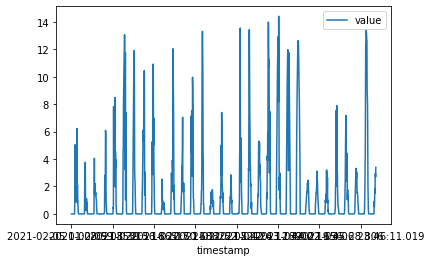

In [189]:
humber_total_power.plot(x='timestamp', y='value');

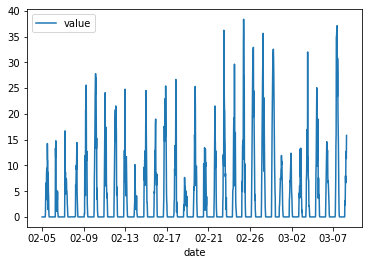

In [190]:
tamar_total_power.plot(x='date', y='value');

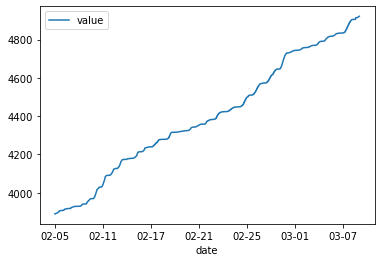

In [191]:
humber_total_energy.plot(x='date', y='value');

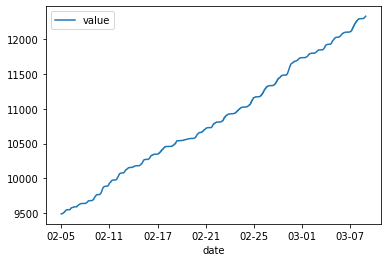

In [192]:
tamar_total_energy.plot(x='date', y='value');

,timestamp,name,attribute_name,value,fulltimestamp,date,time
5459,2021-02-25 00:13:53.593,Tamar building,totalPower,0.0000,2021-02-25 00:13:53.593,02-25,00:13:53.593
5461,2021-02-25 00:43:53.676,Tamar building,totalPower,0.0000,2021-02-25 00:43:53.676,02-25,00:43:53.676
5463,2021-02-25 01:13:53.767,Tamar building,totalPower,0.0000,2021-02-25 01:13:53.767,02-25,01:13:53.767
5465,2021-02-25 01:43:53.849,Tamar building,totalPower,0.0000,2021-02-25 01:43:53.849,02-25,01:43:53.849
5467,2021-02-25 02:13:54.043,Tamar building,totalPower,0.0000,2021-02-25 02:13:54.043,02-25,02:13:54.043
5469,2021-02-25 02:43:54.267,Tamar building,totalPower,0.0000,2021-02-25 02:43:54.267,02-25,02:43:54.267
5471,2021-02-25 03:13:54.344,Tamar building,totalPower,0.0000,2021-02-25 03:13:54.344,02-25,03:13:54.344
5473,2021-02-25 03:43:54.412,Tamar building,totalPower,0.0000,2021-02-25 03:43:54.412,02-25,03:43:54.412
3,2021-02-25 04:13:54.488,Tamar building,totalPower,0.0000,2021-02-25 04:13:54.488,02-25,04:13:54.488
9,2021-02-25 04:43:54.561,Tamar building,totalPower,0.0000,2021-02-25 04:43:54.561,02-25,04:43:54.561


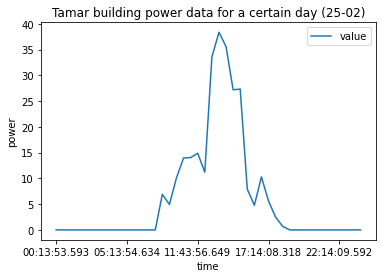

In [193]:
# For a certain day (25-02)
tamar_total_power_date.sort_values(by='time')
diagram = tamar_total_power_date.plot(x='time', y='value',title='Tamar building power data for a certain day (25-02)');
diagram.set_xlabel("time")
diagram.set_ylabel("power")
tamar_total_power_date

,timestamp,name,attribute_name,value,fulltimestamp,date,time
566,2021-02-26 00:14:10.456,Tamar building,totalPower,0.0000,2021-02-26 00:14:10.456,02-26,00:14:10.456
574,2021-02-26 00:44:10.542,Tamar building,totalPower,0.0000,2021-02-26 00:44:10.542,02-26,00:44:10.542
582,2021-02-26 01:14:10.617,Tamar building,totalPower,0.0000,2021-02-26 01:14:10.617,02-26,01:14:10.617
588,2021-02-26 01:44:10.691,Tamar building,totalPower,0.0000,2021-02-26 01:44:10.691,02-26,01:44:10.691
594,2021-02-26 02:14:10.763,Tamar building,totalPower,0.0000,2021-02-26 02:14:10.763,02-26,02:14:10.763
600,2021-02-26 02:44:11.061,Tamar building,totalPower,0.0000,2021-02-26 02:44:11.061,02-26,02:44:11.061
602,2021-02-26 03:14:11.283,Tamar building,totalPower,0.0000,2021-02-26 03:14:11.283,02-26,03:14:11.283
614,2021-02-26 03:44:11.452,Tamar building,totalPower,0.0000,2021-02-26 03:44:11.452,02-26,03:44:11.452
626,2021-02-26 04:14:11.518,Tamar building,totalPower,0.0000,2021-02-26 04:14:11.518,02-26,04:14:11.518
630,2021-02-26 04:44:11.587,Tamar building,totalPower,0.0000,2021-02-26 04:44:11.587,02-26,04:44:11.587


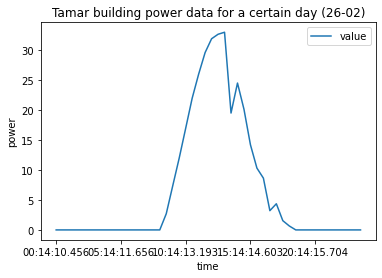

In [194]:
# For a certain day
tamar_total_power_date2.sort_values(by='time')
diagram = tamar_total_power_date2.plot(x='time', y='value',title='Tamar building power data for a certain day (26-02)');
diagram.set_xlabel("time")
diagram.set_ylabel("power")
tamar_total_power_date2

# What time is there usage

Here you can see the times when zero consumption was achieved:

## Tamar building

In [195]:
tamar_building = tamar_total_power[tamar_total_power['value'] == 0.0000]
tamar_building['timestamp'] = [x.split(' ')[1].split(':')[0].strip() for x in tamar_building['timestamp']]
unique_hours = tamar_building['timestamp'].unique()
print(unique_hours)

['01' '02' '03' '04' '05' '06' '07' '08' '18' '19' '20' '21' '22' '23'
 '00' '09' '17' '10' '11']


<ipython-input-195-77f85c29214d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tamar_building['timestamp'] = [x.split(' ')[1].split(':')[0].strip() for x in tamar_building['timestamp']]


In [196]:
tamar_total_power_date_cleaned =tamar_total_power_date[tamar_total_power_date['value'] == 0.0000]
tamar_total_power_date_cleaned.sort_values(by='time')
print(tamar_total_power_date_cleaned.time)

5459    00:13:53.593
5461    00:43:53.676
5463    01:13:53.767
5465    01:43:53.849
5467    02:13:54.043
5469    02:43:54.267
5471    03:13:54.344
5473    03:43:54.412
3       04:13:54.488
9       04:43:54.561
16      05:13:54.634
22      05:43:54.727
26      06:13:54.798
40       08:13:55.18
48      08:43:55.299
496     18:44:08.816
502     19:14:08.893
508     19:44:08.987
518     20:14:09.064
521     20:44:09.175
536     21:14:09.423
538     21:44:09.521
545     22:14:09.592
550     22:44:09.691
558     23:14:09.762
562     23:44:09.896
Name: time, dtype: object


,timestamp,name,attribute_name,value,fulltimestamp,date,time
65,2021-02-25 09:13:55.425,Tamar building,totalPower,6.9065,2021-02-25 09:13:55.425,02-25,09:13:55.425
80,2021-02-25 09:43:55.599,Tamar building,totalPower,4.9345,2021-02-25 09:43:55.599,02-25,09:43:55.599
108,2021-02-25 10:13:55.79,Tamar building,totalPower,10.1250,2021-02-25 10:13:55.79,02-25,10:13:55.79
128,2021-02-25 10:43:55.857,Tamar building,totalPower,13.9570,2021-02-25 10:43:55.857,02-25,10:43:55.857
165,2021-02-25 11:13:55.979,Tamar building,totalPower,14.0410,2021-02-25 11:13:55.979,02-25,11:13:55.979
202,2021-02-25 11:43:56.649,Tamar building,totalPower,14.8780,2021-02-25 11:43:56.649,02-25,11:43:56.649
225,2021-02-25 12:13:56.796,Tamar building,totalPower,11.1870,2021-02-25 12:13:56.796,02-25,12:13:56.796
255,2021-02-25 12:43:56.888,Tamar building,totalPower,33.5650,2021-02-25 12:43:56.888,02-25,12:43:56.888
275,2021-02-25 13:13:57.586,Tamar building,totalPower,38.3630,2021-02-25 13:13:57.586,02-25,13:13:57.586
299,2021-02-25 13:43:57.694,Tamar building,totalPower,35.5755,2021-02-25 13:43:57.694,02-25,13:43:57.694


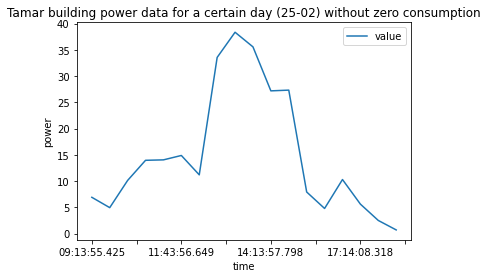

In [197]:
tamar_total_power_date_cleaned = tamar_total_power_date[tamar_total_power_date['value'] != 0.0000]
tamar_total_power_date_cleaned.sort_values(by='time')
diagram = tamar_total_power_date_cleaned.plot(x='time', y='value',title='Tamar building power data for a certain day (25-02) without zero consumption');
diagram.set_xlabel("time")
diagram.set_ylabel("power")
tamar_total_power_date_cleaned

We can see that power is consumed from 9 to around 17:30

#  Humber building

In [198]:
humber_building = humber_total_power[humber_total_power['value'] == 0.0000]
humber_building['timestamp'] = [x.split(' ')[1].split(':')[0].strip() for x in humber_building['timestamp']]
unique_hours = humber_building['timestamp'].unique()
print(unique_hours)

['01' '02' '03' '04' '05' '06' '07' '08' '18' '19' '20' '21' '22' '23'
 '00' '09' '17']


<ipython-input-198-cc669cfa8044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humber_building['timestamp'] = [x.split(' ')[1].split(':')[0].strip() for x in humber_building['timestamp']]


In [201]:
humber_total_power_date_cleaned = humber_total_power_date[humber_total_power_date['value'] == 0.0000]
humber_total_power_date_cleaned.sort_values(by='time')
print(humber_total_power_date_cleaned.time)

5458    00:13:47.055
5460      00:43:47.2
5462    01:13:47.379
5464    01:43:47.557
5466    02:13:47.725
5468     02:43:48.42
5470     03:13:48.48
5472    03:43:48.586
2       04:13:48.669
8       04:43:48.893
15      05:13:49.026
21      05:43:49.138
25      06:13:49.385
493     18:43:55.182
501      19:13:55.36
507     19:43:55.506
517     20:13:56.319
520     20:43:56.532
535     21:13:56.844
537      21:43:56.95
544     22:13:57.108
549     22:43:57.263
557     23:13:57.404
561     23:43:57.536
Name: time, dtype: object


We can see that the data that has been given to us was taken in a 30min interval

,timestamp,name,attribute_name,value,fulltimestamp,date,time
1484,2021-02-05 09:09:02.533,Humber building,totalPower,0.878000,2021-02-05 09:09:02.533,02-05,09:09:02.533
1540,2021-02-05 09:39:02.685,Humber building,totalPower,1.669000,2021-02-05 09:39:02.685,02-05,09:39:02.685
1620,2021-02-05 10:09:02.789,Humber building,totalPower,5.040000,2021-02-05 10:09:02.789,02-05,10:09:02.789
1668,2021-02-05 10:39:03.38,Humber building,totalPower,0.890000,2021-02-05 10:39:03.38,02-05,10:39:03.38
1716,2021-02-05 11:09:03.502,Humber building,totalPower,0.941000,2021-02-05 11:09:03.502,02-05,11:09:03.502
1748,2021-02-05 11:39:03.601,Humber building,totalPower,2.134000,2021-02-05 11:39:03.601,02-05,11:39:03.601
1786,2021-02-05 12:09:03.758,Humber building,totalPower,2.345000,2021-02-05 12:09:03.758,02-05,12:09:03.758
1804,2021-02-05 12:39:03.846,Humber building,totalPower,2.521667,2021-02-05 12:39:03.846,02-05,12:39:03.846
1844,2021-02-05 13:09:04.055,Humber building,totalPower,1.070000,2021-02-05 13:09:04.055,02-05,13:09:04.055
1896,2021-02-05 13:39:04.314,Humber building,totalPower,2.121000,2021-02-05 13:39:04.314,02-05,13:39:04.314


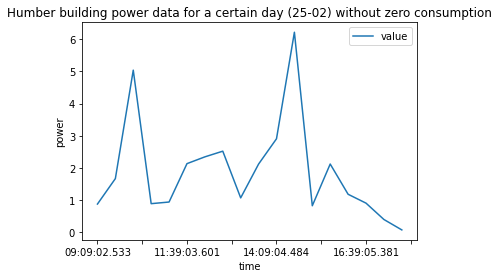

In [206]:
humber_total_power_date_cleaned = humber_total_power[humber_total_power['value'] != 0.0000]
humber_total_power_date_cleaned = humber_total_power_date_cleaned[humber_total_power_date_cleaned['date'] == "02-05"]
humber_total_power_date_cleaned.sort_values(by='time')
diagram = humber_total_power_date_cleaned.plot(x='time', y='value',title='Humber building power data for a certain day (02-05) without zero consumption');
diagram.set_xlabel("time")
diagram.set_ylabel("power")
humber_total_power_date_cleaned